In [8]:
import zipfile

import matplotlib.pyplot as plt

from hda import Client

import geopandas as gpd
from geocube.api.core import make_geocube
%run helpers.ipynb

In [ ]:
data = {
    "datasetId": "EO:CLMS:DAT:CORINE",
    "stringChoiceValues": [
        {
            "name": "product_type",
            "value": "Corine Land Cover 2018"
        },
        {
            "name": "format",
            "value": "GeoPackage"
        }
    ]
}

In [9]:
c = Client(debug=False)

matches = c.search(data)
matches.download()

Exception: Missing/incomplete configuration file: /home/jovyan/.hdarc

In [3]:
zip_ref = zipfile.ZipFile("u2018_clc2018_v2020_20u1_geoPackage.zip")
zip_ref.extractall("./data")
zip_ref.close() # close file

In [5]:
gdf = gpd.read_file("data/u2018_clc2018_v2020_20u1_geoPackage/DATA/U2018_CLC2018_V2020_20u1.gpkg")

In [8]:
gdf

,Code_18,Remark,Area_Ha,ID,geometry
0,111,None,130.863654,EU_1,"MULTIPOLYGON (((1917182.160 943608.860, 191714..."
1,111,None,53.744524,EU_2,"MULTIPOLYGON (((1953122.840 950507.440, 195311..."
2,111,None,30.719104,EU_3,"MULTIPOLYGON (((1956709.150 951094.550, 195669..."
3,111,None,50.201782,EU_4,"MULTIPOLYGON (((1805587.500 950821.540, 180555..."
4,111,None,481.848803,EU_5,"MULTIPOLYGON (((1792547.840 952643.380, 179251..."
...,...,...,...,...,...
2375401,512,None,807.040751,EU_2375402,"MULTIPOLYGON (((4958287.940 5319798.460, 49582..."
2375402,512,None,141.362708,EU_2375403,"MULTIPOLYGON (((4955932.460 5325540.080, 49558..."
2375403,512,None,246.634201,EU_2375404,"MULTIPOLYGON (((4956804.160 5330567.090, 49567..."
2375404,512,None,41.845799,EU_2375405,"MULTIPOLYGON (((4957909.360 5364282.460, 49579..."


In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [28]:
spain = gpd.clip(gdf, world[world["name"] == "Spain"].to_crs("EPSG:3035"))

<AxesSubplot:>

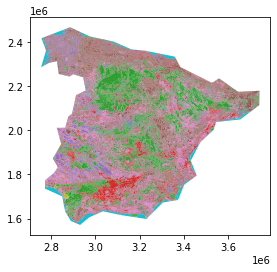

In [32]:
spain.plot(column= "Code_18")

In [35]:
import matplotlib.pyplot as plt
plt.savefig("spain.svg")


<Figure size 432x288 with 0 Axes>

In [36]:
gdf.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ